In [1]:
pip install numpy==1.26.4 scikit-learn==1.3.2 imbalanced-learn==0.11.0 joblib==1.3.2


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load data & check

In [5]:
df=pd.read_csv('/content/drive/MyDrive/MACHINE DATA/Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
print(df.shape)
print('----------------')

print(df['Churn'].value_counts())
print('----------------')

print(df.isna().sum())

(7043, 21)
----------------
Churn
No     5174
Yes    1869
Name: count, dtype: int64
----------------
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.duplicated().sum()

0

# according to above observation
--------
1.There are total 7043 Rows and 21 Column.

2.You’ll see more “No” than “Yes” -> class imbalance total "No "(**5174**) & "Yes" (**1869**).

3.There is no null values in dataset.

# **VISUALS**


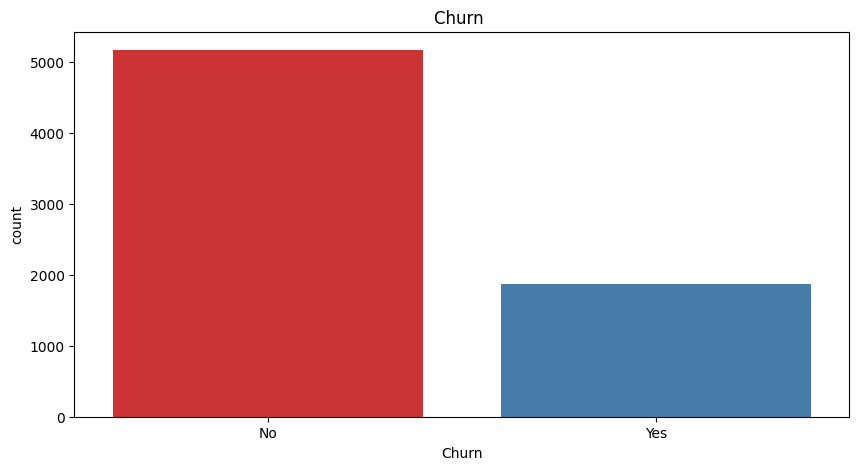

In [9]:
#Churn distribution

plt.figure(figsize=(10,5))
sns.countplot(df,x='Churn',hue='Churn',palette='Set1')
plt.title('Churn ')
plt.show()

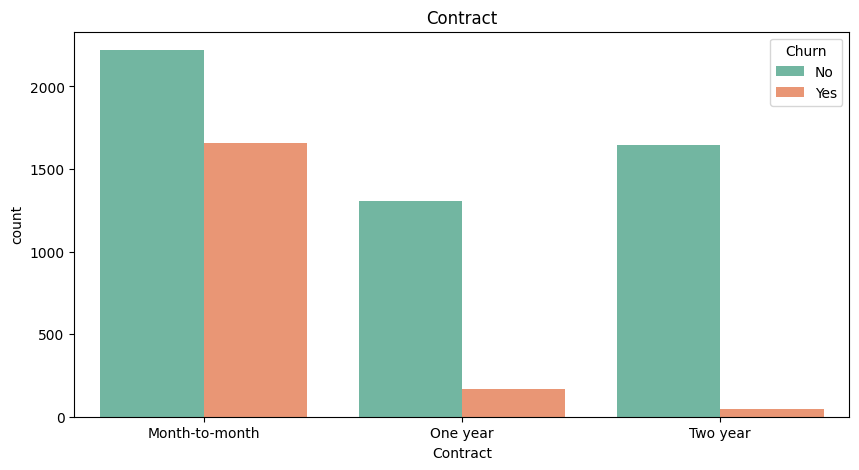

In [10]:
#contract churn count
plt.figure(figsize=(10,5))
sns.countplot(df,x='Contract',hue='Churn',palette='Set2')
plt.title('Contract')
plt.show()

#month  to month contracts churn the most

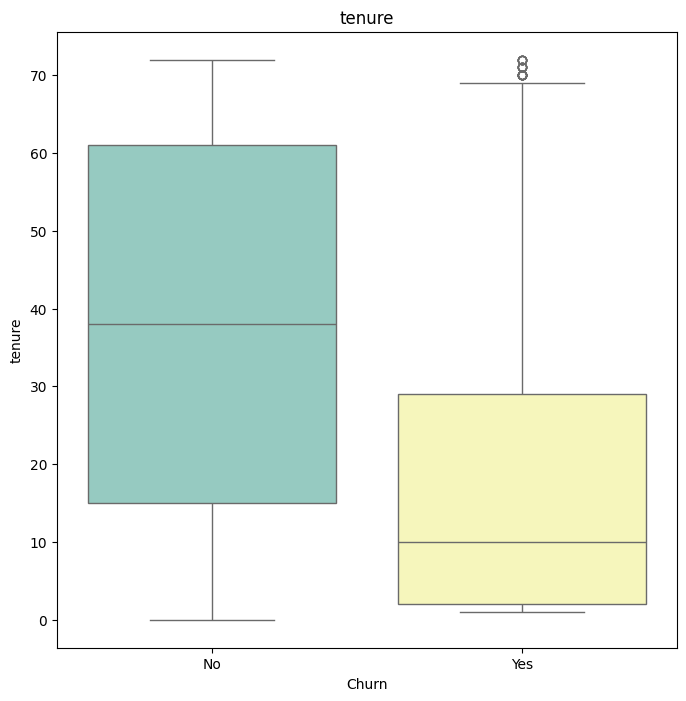

In [11]:
# churn vs tenure
plt.figure(figsize=(8,8))
sns.boxplot(df,x='Churn',y='tenure',palette='Set3', hue='Churn')
plt.xlabel('Churn')
plt.ylabel('tenure')
plt.title('tenure')
plt.show()

#Customers with low tenure churn more


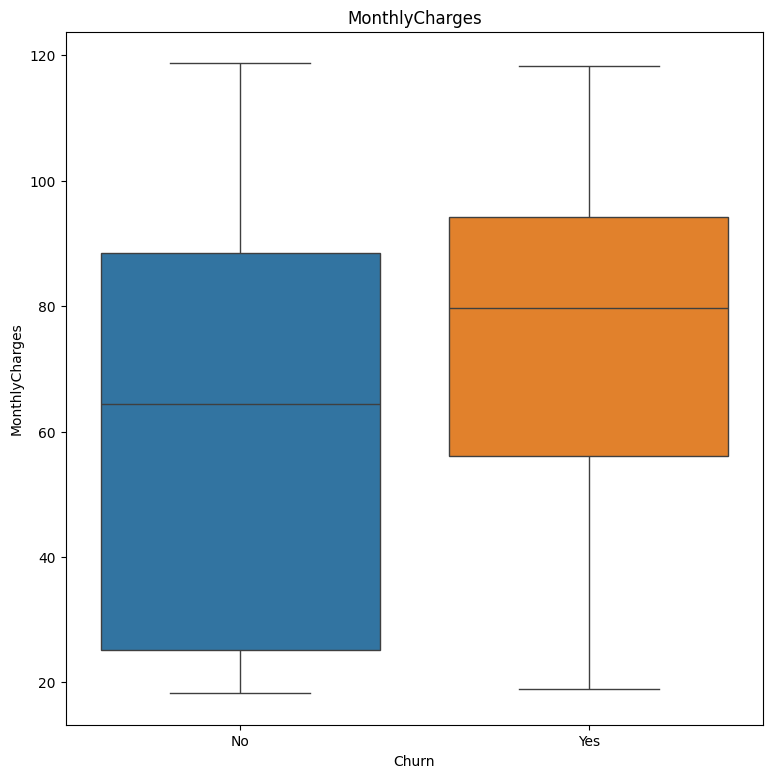

In [12]:
# Churn vs Monthly Charges
plt.figure(figsize=(9,9))
sns.boxplot(df,x='Churn',y='MonthlyCharges',hue='Churn')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.title('MonthlyCharges')
plt.show()

#high charges also incresase churn risk

# Data Cleaning

In [13]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [14]:
df['TotalCharges'].isna().sum()

11

In [15]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

Column is wrongly stored as string

ML models require numeric values

# Encode Target Variable

In [16]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

Feature engineering

In [17]:
df['avg_monthly_spend']=df['TotalCharges']/(df['tenure']+1)

df['tenure_group']=pd.cut(
    df['tenure'],
    bins=[0,12,24,36,48,78],
    labels=['0-1yr','1-2yr','2-3yr','3-4yr','4-6yr']
)

In [18]:
df = df.drop('customerID', axis=1)


In [19]:
df=pd.get_dummies(df,drop_first=True)

Convert categorical variables into numeric

drop_first=True avoids multicollinearity

# split feature and target


In [20]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [21]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# handle class imbalance

**PIPELINE FOR LOGISTIC REGRESSION**

In [22]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

lr_pipeline=Pipeline([
    ('smote',SMOTE(random_state=42)),
    ('scaler',StandardScaler()),
    ('lr',LogisticRegression(
        class_weight='balanced'
        ,random_state=42))
])



In [23]:
from sklearn.model_selection import cross_val_score

print(
    cross_val_score(
        lr_pipeline,
        X_train,y_train,
        scoring='roc_auc',cv=5
    ).mean()
)

0.8374977129758457


#DecisionTREE using **pipeline**

In [24]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

dt_pipeline=Pipeline([
    ('smote',SMOTE(random_state=42)),
    ('scaler',StandardScaler()),
    ('dt',DecisionTreeClassifier(
        class_weight='balanced',
        criterion='gini',
        min_samples_split=3,
        max_depth=3,
        random_state=42))
])

In [25]:
print(
    cross_val_score(
        dt_pipeline,
        X_train,y_train,
        scoring='roc_auc',cv=5
    ).mean()
)

0.7817912494807369


**#RANDOMFOREST PIPELINE**

In [26]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

rf_pipeline=Pipeline([
    ('smote',SMOTE(random_state=42)),
    ('rf',RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        min_samples_leaf=20,
        max_features='sqrt',
        random_state=42))
])

In [27]:
print(cross_val_score(
    rf_pipeline,
    X_train,y_train,
    scoring='roc_auc',cv=5
).mean())

0.8414671585480509


In [28]:
lr_pipeline.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [29]:
y_prob = lr_pipeline.predict_proba(X_test)[:, 1]


# Model EValuation

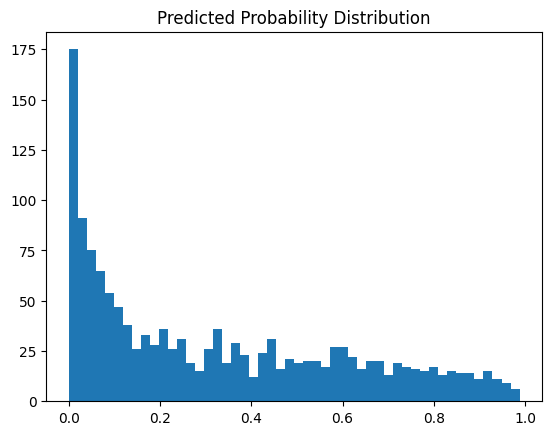

In [30]:
plt.hist(y_prob, bins=50)
plt.title("Predicted Probability Distribution")
plt.show()


In [31]:
from sklearn.metrics import roc_curve, auc, classification_report
for t in [ 0.4,0.5,0.7]:
    y_pred = (y_prob > t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, y_pred))


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1035
           1       0.52      0.70      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.73      0.70      1409
weighted avg       0.78      0.75      0.76      1409


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1035
           1       0.55      0.59      0.57       374

    accuracy                           0.76      1409
   macro avg       0.70      0.71      0.70      1409
weighted avg       0.77      0.76      0.76      1409


Threshold: 0.7
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1035
           1       0.67      0.36      0.47       374

    accuracy                           0.78      1409
   macro avg       0.74      0.65      0.67      1409
weighted avg       0.77   

In [32]:
FINAL_THRESHOLD = 0.5   # chosen after analysis

y_pred_final = (y_prob > FINAL_THRESHOLD).astype(int)


In [33]:

feature_importance = pd.Series(
    lr_pipeline.named_steps['lr'].coef_[0],
    index=X.columns
).sort_values(key=abs, ascending=False)

print("\nTop 15 Important Features:")
print(feature_importance.head(15))


Top 15 Important Features:
MonthlyCharges                   -7.333550
InternetService_Fiber optic       4.091333
tenure                           -2.688867
PhoneService_Yes                  2.620865
avg_monthly_spend                -2.302333
StreamingMovies_Yes               1.570579
StreamingTV_Yes                   1.546898
MultipleLines_No phone service    1.373924
tenure_group_4-6yr                1.270958
MultipleLines_Yes                 1.006655
TotalCharges                      0.892732
DeviceProtection_Yes              0.751130
OnlineBackup_Yes                  0.657845
tenure_group_3-4yr                0.634392
PaymentMethod_Electronic check    0.570366
dtype: float64


In [34]:
import joblib

joblib.dump(lr_pipeline, "churn_model_pipeline.pkl")


['churn_model_pipeline.pkl']

In [35]:
joblib.dump(X.columns.tolist(), "model_features.pkl")


['model_features.pkl']

In [36]:
df_dashboard = X_test.copy()
df_dashboard['Actual_Churn'] = y_test.values
df_dashboard['Churn_Probability'] = y_prob
df_dashboard['Predicted_Churn'] = y_pred_final

In [37]:
df_dashboard.to_csv('churn_dashboard_data.csv', index=False)